In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd 
import pmdarima as pm
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [3]:
data = pd.read_csv('../ts_data/monthly-beer-production-in-austr.csv', 
                   parse_dates=['Month'], 
                   index_col=['Month'])

In [4]:
print(data.shape)
data.head()

(476, 1)


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


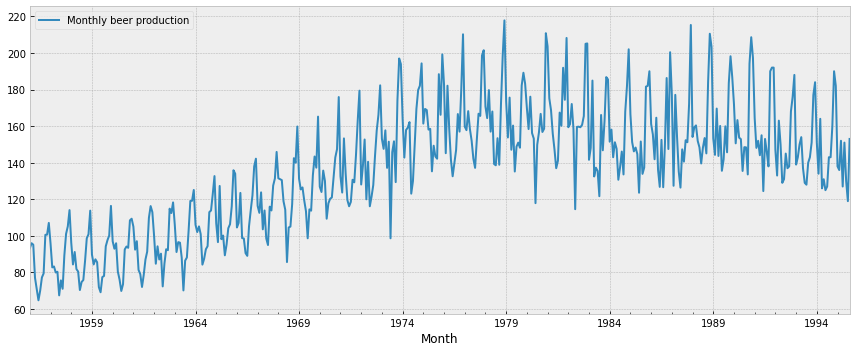

In [5]:
data.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

In [6]:
train, test = pm.model_selection.train_test_split(data, test_size=0.2)

In [7]:
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (380, 1)
Test: (96, 1)


In [8]:
arima = pm.auto_arima(train, trace=True, m=12, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3309.611, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3109.448, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3127.029, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3307.628, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3285.652, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3091.028, Time=1.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3177.040, Time=0.64 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2920.876, Time=2.38 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2951.170, Time=0.71 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2916.378, Time=2.31 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : 

In [9]:
arima

ARIMA(order=(5, 1, 4), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [10]:
print(arima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  380
Model:             SARIMAX(5, 1, 4)x(2, 0, [1], 12)   Log Likelihood               -1375.575
Date:                              Mon, 21 Mar 2022   AIC                           2777.149
Time:                                      11:33:51   BIC                           2828.337
Sample:                                           0   HQIC                          2797.463
                                              - 380                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1824      0.058     -3.153      0.002      -0.296      -0.069
ar.L2         -0.09

In [11]:
# write arima_summary to text file
with open('arima_summary.txt', 'w') as file:
    file.writelines(arima.summary().as_text())

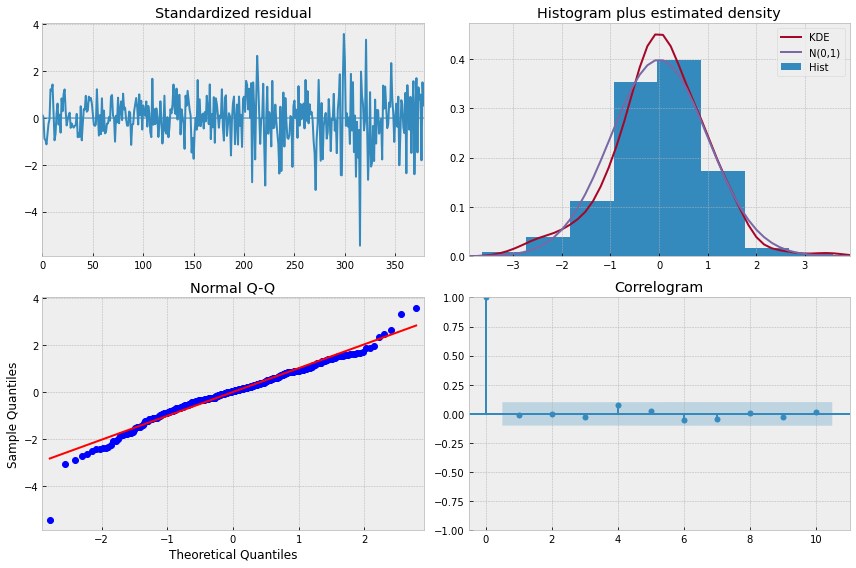

In [12]:
arima.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

In [13]:
train_pred = arima.predict_in_sample(dynamic=False)

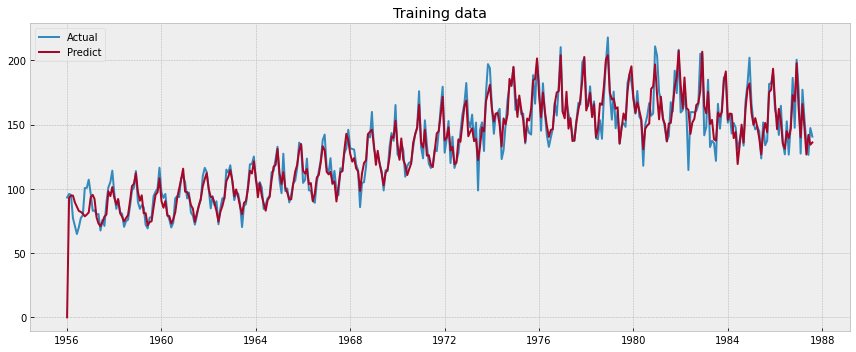

In [14]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(train.index ,train.values, label='Actual')
ax.plot(train.index, train_pred, label='Predict', linestyle="-")
ax.legend()
ax.set_title("Training data")

plt.tight_layout()
plt.show()

In [15]:
test_pred, test_conf = arima.predict(n_periods=len(test), return_conf_int=True, alpha=0.05)

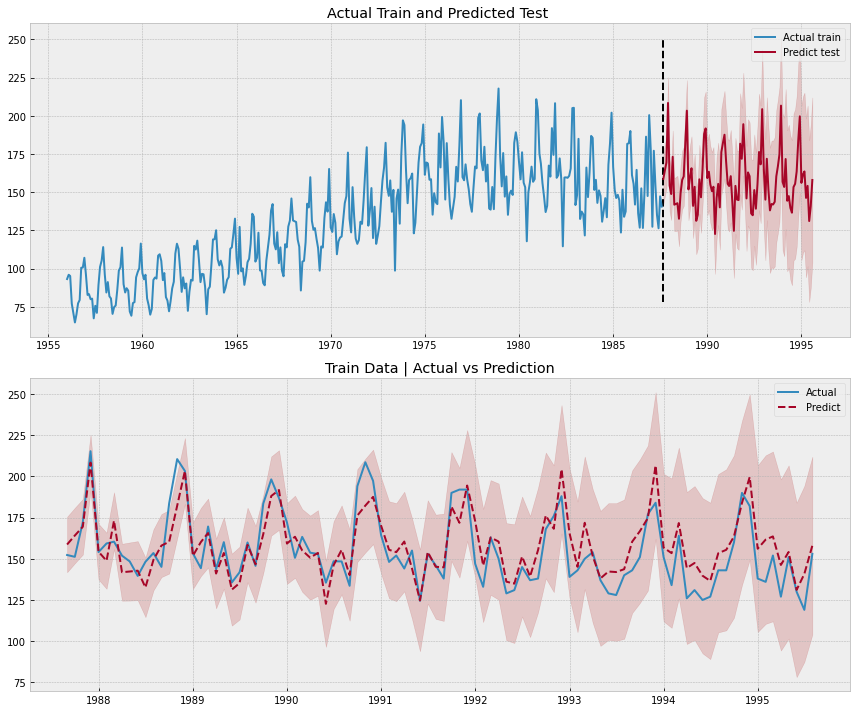

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))

ax[0].plot(train.index, train.values, label='Actual train')
ax[0].plot(test.index, test_pred, label='Predict test')
ax[0].fill_between(x=test.index, y1=test_conf[:,0], y2=test_conf[:,1], alpha=0.2, color='firebrick')
ax[0].vlines(x=test.index[0], ymin=test_conf.min(), ymax=test_conf.max(), color='k', linestyle='--')
ax[0].set_title("Actual Train and Predicted Test ")
ax[0].legend()

ax[1].plot(test.index, test.values, label="Actual")
ax[1].plot(test.index, test_pred, linestyle='--', label="Predict")
ax[1].fill_between(x=test.index, y1=test_conf[:,0], y2=test_conf[:,1], alpha=0.2, color='firebrick')
ax[1].set_title("Train Data | Actual vs Prediction")
ax[1].legend()

plt.tight_layout()
plt.show()